# Ensemble Learning Example with a Linear Regression Base
### Chistopher Evans 
### November 7, 2019

We are continuing work from the notebook titled 'Data Processing and EDA'. We are now going to see the reactions of various machine learning algorithms using scikit. There will be annotations that will add more clarity to the results.

To retain simplicity, the purpose of the models is to see if ASD Traits can be detected through the 10 questions themsleves. Performance will be evaluated and compared.

## Gathering The Data

In [7]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"

# Importing the actual datasets
screening = pd.read_csv("Toddler Autism dataset July 2018.csv")

# Extracting the names of the columns for future use
colnames = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
results = ['Class/ASD Traits ']

#Gathering all of the data
screening_extracted = screening[colnames]
screening_answers = screening[results]

# Simplifying the data into 1s and 0s for easier use
screening_numerical = screening_answers.eq("Yes").mul(1)

## Linear Regression Base Classifier

In [27]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Setting up the variables
X = screening_extracted.as_matrix()
y = screening_numerical.as_matrix()

# Setting up the sets
train_set, test_set = train_test_split(X, test_size=0.2, random_state = 42)
train_set2, test_set2 = train_test_split(y, test_size=0.2, random_state = 42)

# Doing linear regression
screening_lin = linear_model.LinearRegression()
screening_lin.fit(train_set, train_set2)
results = screening_lin.predict(test_set)

from sklearn.metrics import f1_score

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results.round()))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

F1 Score:
0.9857142857142858


## Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

screening_tree = RandomForestClassifier()
screening_tree.fit(train_set, train_set2)
results = screening_tree.predict(test_set)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confustion Matrix:
[ 68   1   3 139]
Precision:
0.9928571428571429
Recall:
0.9788732394366197
F1 Score:
0.9858156028368794
Area Under the ROC:
0.9821902429067156


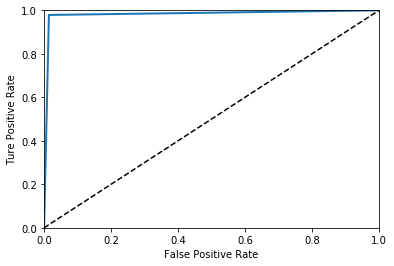

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

screening_bag = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
screening_bag.fit(train_set, train_set2)
results = screening_bag.predict(test_set)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

Confustion Matrix:
[ 69   0   1 141]
Precision:
1.0
Recall:
0.9929577464788732
F1 Score:
0.9964664310954063
Area Under the ROC:
0.9964788732394366


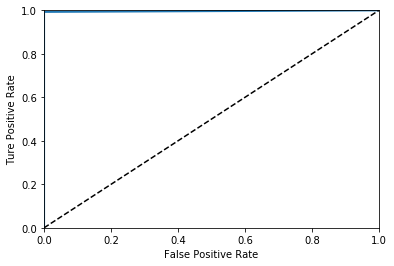

In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

## Adaboost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

screening_boost = AdaBoostClassifier()
screening_boost.fit(train_set, train_set2)
results = screening_boost.predict(test_set)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Confustion Matrix:
[ 69   0   0 142]
Precision:
1.0
Recall:
1.0
F1 Score:
1.0
Area Under the ROC:
1.0


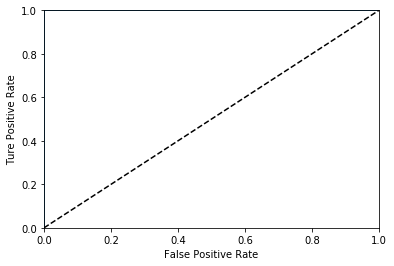

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
returned = confusion_matrix(test_set2, results, labels = [0,1]).ravel()

if len(returned) == 4:
    tn, fp, fn, tp = returned
precision = (tp/(tp + fp))
recall = (tp/(tp + fn))
    
print ("Confustion Matrix:")    
print (returned)
print ("Precision:")    
print (precision)
print ("Recall:")    
print (recall)

# Getting the F1 score
print ("F1 Score:")
print (f1_score(test_set2, results))
# Getting the Area Under the ROC
print ("Area Under the ROC:")    
print (roc_auc_score(test_set2, results))

# Getting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_set2, results)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Ture Positive Rate')

# Plotting the curve
plot_roc_curve(fpr, tpr)
plt.show()

This is where we look to see how important the features considered were. As we can the answers of quesiton 8 were the most important, but not by much.

In [25]:
for name, score in zip(screening, screening_tree.feature_importances_):
    print(name, score)

Case_No 0.07804513823313684
A1 0.11076980834554873
A2 0.034325450294954915
A3 0.08987888733744431
A4 0.09404606585435538
A5 0.11254993919055008
A6 0.1540145401792586
A7 0.08612710239460555
A8 0.1943060911698114
A9 0.04593697700033418
